# Compare ML inference techniques

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import duckdb

In [3]:
con = duckdb.connect("../test.db")
times = con.sql(f"SELECT * FROM times").df()
con.close()

In [4]:
data = times.drop(columns=['dataset', 'ts']).melt(id_vars=['pipeline', 'workload'], value_vars=['move', 'load', 'predict'], var_name='phase', value_name='time')
data.head()

,pipeline,workload,phase,time
0,python_udf_vec,1000000,move,218034
1,python_udf_vec,5000000,move,1185950
2,python_udf_vec,10000000,move,2224030
3,python_udf_vec,15000000,move,3188160
4,python_udf_vec,20000000,move,4314927


In [5]:
sliced = pd.DataFrame(data[data['pipeline'].isin(['traditional', 'python_udf_vec', 'opt_vec_torch', 'opt_vec_onnx', 'opt_vec_onnx_single', 'opt_vec_torch_single'])])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'python_udf_vec'),
  Text(1, 0, 'traditional'),
  Text(2, 0, 'opt_vec_torch_single'),
  Text(3, 0, 'opt_vec_onnx_single'),
  Text(4, 0, 'opt_vec_torch'),
  Text(5, 0, 'opt_vec_onnx')])

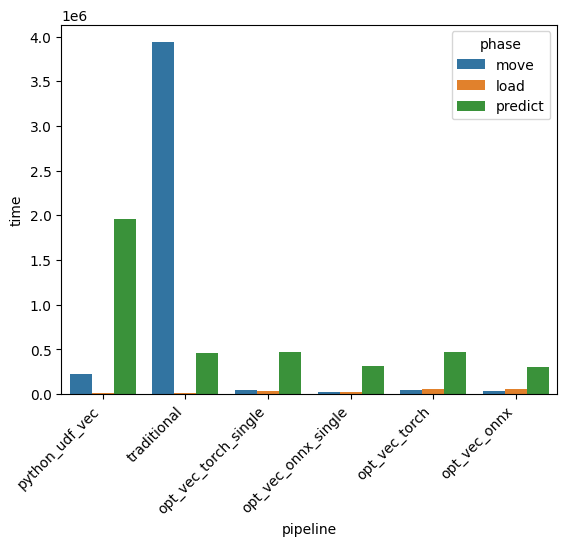

In [6]:
sns.barplot(sliced[sliced.workload == 1000000], x="pipeline", y="time", hue="phase", errorbar=None)
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'python_udf_vec'),
  Text(1, 0, 'traditional'),
  Text(2, 0, 'opt_vec_torch_single'),
  Text(3, 0, 'opt_vec_onnx_single'),
  Text(4, 0, 'opt_vec_torch'),
  Text(5, 0, 'opt_vec_onnx')])

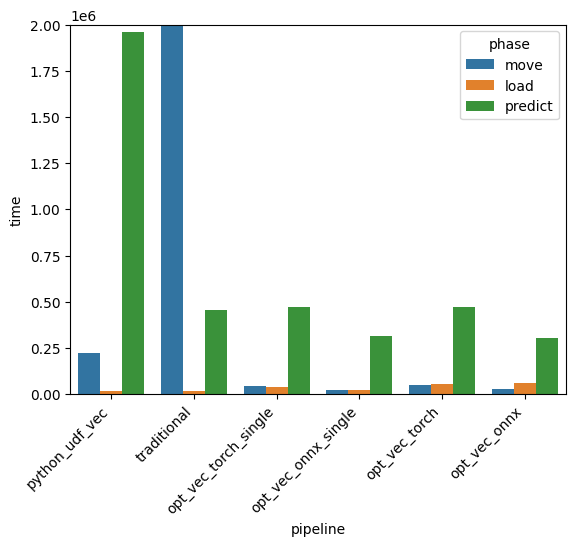

In [7]:
sns.barplot(sliced[sliced.workload == 1000000], x="pipeline", y="time", hue="phase", errorbar=None)
plt.ylim(0, 2000000)
plt.xticks(rotation=45, ha='right')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'python_udf_vec'),
  Text(1, 0, 'traditional'),
  Text(2, 0, 'opt_vec_torch'),
  Text(3, 0, 'opt_vec_onnx'),
  Text(4, 0, 'opt_vec_torch_single'),
  Text(5, 0, 'opt_vec_onnx_single')])

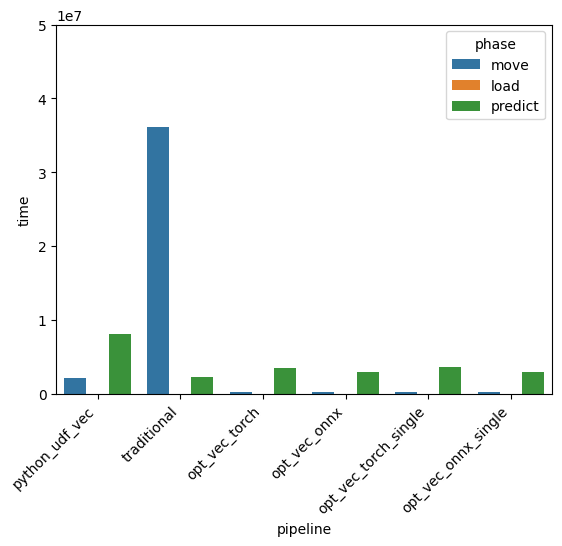

In [8]:
sns.barplot(sliced[sliced.workload == 10000000], x="pipeline", y="time", hue="phase", errorbar=None)
plt.ylim(0, 50000000)
plt.xticks(rotation=45, ha='right')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'python_udf_vec'),
  Text(1, 0, 'traditional'),
  Text(2, 0, 'opt_vec_onnx'),
  Text(3, 0, 'opt_vec_torch'),
  Text(4, 0, 'opt_vec_onnx_single'),
  Text(5, 0, 'opt_vec_torch_single')])

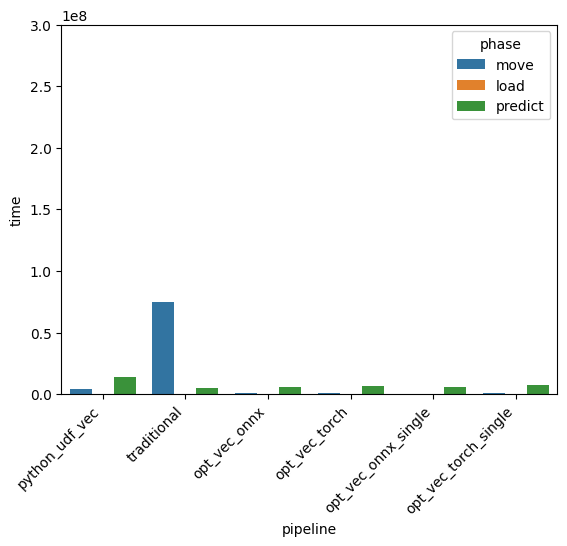

In [9]:
sns.barplot(sliced[sliced.workload == 20000000], x="pipeline", y="time", hue="phase", errorbar=None)
plt.ylim(0, 300000000)
plt.xticks(rotation=45, ha='right')


In [10]:
summary = times.drop(columns=['dataset', 'ts'])
summary['inference'] = summary['predict'] + summary['load']
summary['total'] = summary['inference'] + summary['move']

summary.head()

,pipeline,workload,move,load,predict,inference,total
0,python_udf_vec,1000000,218034,13971,2139728,2153699,2371733
1,python_udf_vec,5000000,1185950,14044,5536022,5550066,6736016
2,python_udf_vec,10000000,2224030,13889,7646142,7660031,9884061
3,python_udf_vec,15000000,3188160,13680,11789199,11802879,14991039
4,python_udf_vec,20000000,4314927,15031,14350052,14365083,18680010


In [11]:
summary['pipeline'].drop_duplicates()

0           python_udf_vec
15             traditional
30     opt_vec_onnx_single
31           opt_vec_torch
32            opt_vec_onnx
42    opt_vec_torch_single
Name: pipeline, dtype: object

(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 [Text(0.0, 0, '0.00'),
  Text(2500000.0, 0, '0.25'),
  Text(5000000.0, 0, '0.50'),
  Text(7500000.0, 0, '0.75'),
  Text(10000000.0, 0, '1.00'),
  Text(12500000.0, 0, '1.25'),
  Text(15000000.0, 0, '1.50'),
  Text(17500000.0, 0, '1.75'),
  Text(20000000.0, 0, '2.00'),
  Text(22500000.0, 0, '2.25')])

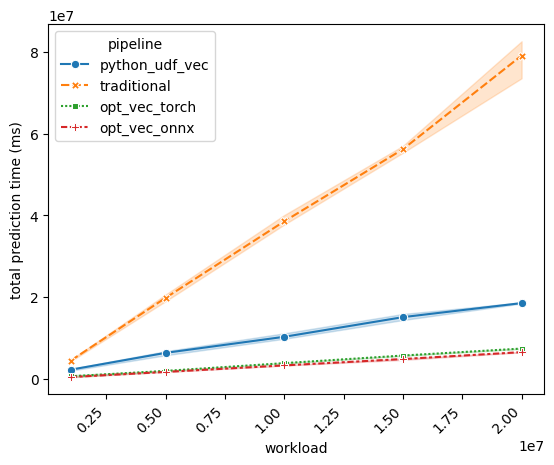

In [12]:
fil = ['traditional', 'python_udf_vec', 'opt_vec_torch', 'opt_vec_onnx']#, 'opt_vec_torch_single', 'opt_vec_onnx_single']
subsum = summary[summary['pipeline'].isin(fil)]

sns.lineplot(x='workload', y='total', hue='pipeline', style='pipeline', markers=True, data=subsum)
plt.ylabel('total prediction time (ms)')
plt.xticks(rotation=45, ha='right')


(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 [Text(0.0, 0, '0.00'),
  Text(2500000.0, 0, '0.25'),
  Text(5000000.0, 0, '0.50'),
  Text(7500000.0, 0, '0.75'),
  Text(10000000.0, 0, '1.00'),
  Text(12500000.0, 0, '1.25'),
  Text(15000000.0, 0, '1.50'),
  Text(17500000.0, 0, '1.75'),
  Text(20000000.0, 0, '2.00'),
  Text(22500000.0, 0, '2.25')])

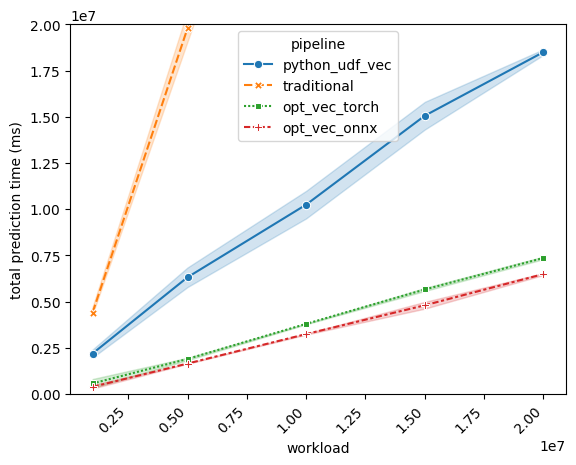

In [14]:
sns.lineplot(x='workload', y='total', hue='pipeline', style='pipeline', markers=True, data=subsum, errorbar='sd')
plt.ylim(0, 20000000)
plt.ylabel('total prediction time (ms)')
plt.xticks(rotation=45, ha='right')
